In [83]:
#Please Note, All rights reserved by its respective owners for the youtube, Google-api & videos owners.
#This is only for educational purposes.

In [84]:
pip install --upgrade google-api-python-client

Note: you may need to restart the kernel to use updated packages.


In [85]:
import pandas as pd
import numpy as np
from apiclient.discovery import build
api_key="Youtube-api-key" #link to get procedures to acquire api https://developers.google.com/youtube/registering_an_application
youtube=build('youtube', 'v3', developerKey=api_key)

In [86]:
def get_channel_videos(channel_id):
    
    
    res = youtube.channels().list(id=channel_id, 
                                  part='contentDetails').execute()
    playlist_id = res['items'][0]['contentDetails']['relatedPlaylists']['uploads']
    
    videos = []
    next_page_token = None
    
    while 1:
        res = youtube.playlistItems().list(playlistId=playlist_id, 
                                           part='snippet', 
                                           maxResults=50,
                                           pageToken=next_page_token).execute()
        videos += res['items']
        next_page_token = res.get('nextPageToken')
        
        if next_page_token is None:
            break
    
    return videos

In [87]:
chid="UCydVvh3Wg4VPvllLHFoe5_A"  
res = youtube.channels().list(id=chid,part='snippet').execute() 
res
#channelid=UCydVvh3Wg4VPvllLHFoe5_A, 
#https://commentpicker.com/youtube-channel-id.php
#This channel has been taken for demonstartion purposes only

{'kind': 'youtube#channelListResponse',
 'etag': 'p0Yp5FyE7Z1qInniyS5yjz6bbDk',
 'pageInfo': {'totalResults': 1, 'resultsPerPage': 5},
 'items': [{'kind': 'youtube#channel',
   'etag': 'jbw44_aMP5sV69IwPCu7EGVzajM',
   'id': 'UCydVvh3Wg4VPvllLHFoe5_A',
   'snippet': {'title': 'Learn Spanish with SpanishPod101.com',
    'description': "Learn Spanish with SpanishPod101.com - The Fastest, Easiest and Most Fun Way to Learn Spanish. :)\n\nStart speaking Spanish in minutes with Audio and Video lessons.\n\nSpanishPod101.com is an online Spanish language learning website. You'll learn to speak, read, write and hear Spanish. You'll have fun learning with listeners around the world. Get ready to start speaking Spanish from the very first lesson!\n\nVisit SpanishPod101.com/video and sign up for your FREE lifetime account.\n\nSee higher quality videos and exclusive videos only on SpanishPod101.com. Go to SpanishPod101.com/video\nLearn Spanish with SpanishPod101.com! The Fastest, Easiest and Most F

In [88]:
videos = get_channel_videos('UCydVvh3Wg4VPvllLHFoe5_A') #channelid=UCydVvh3Wg4VPvllLHFoe5_A 
len(videos)                                             #https://commentpicker.com/youtube-channel-id.php

1399

In [89]:
TITLE=[]
for video in videos:
    title=video['snippet']['title']
    #print(title)
    TITLE.append(title)  
    Title=pd.DataFrame(TITLE)
Title= Title.rename(columns ={0:'Video Title'})
Title

,Video Title
0,ALL the Basics You Need to Master Spanish #18
1,SpanishPod101: Frequently Asked Questions & An...
2,"Want to Learn Spanish Anywhere, Anytime on You..."
3,It's not too late to learn Spanish in 2022!
4,Get a Big 31% OFF to Start Speaking Spanish wi...
...,...
1394,Learn Spanish - Video Vocabulary #5
1395,Learn Spanish - Video Vocabulary #4
1396,Learn Spanish - Video Vocabulary #3
1397,Learn Spanish - Video Vocabulary #2


In [91]:
# For extracting video description for all videos
DESCRIPTION=[]
for description in videos:
    description=description['snippet']['description']
    
    DESCRIPTION.append(description)
Description=pd.DataFrame(DESCRIPTION)
# to print all description dataframe to find missing values like index 5 has missing value
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(Description)
#if you have a missing description for any video in any of index, just cross check from the output and replace the index value in below code after Description.rename(columns={0:"Description"}, inplace=True).
#Description.loc[5,:] = ['Dont have a video Description']
#Description.loc[14,:] = ['Dont have a video Description']
#Description.loc[43,:] = ['Dont have a video Description']
#Description.loc[143,:] = ['Dont have a video Description']
#Description.loc[219,:] = ['Dont have a video Description']
#Description=Description.rename(columns ={0:'Description'})
#Description.rename(columns={0:"Description"}, inplace=True)

                                                      0
0     This is a great video to get started with Span...
1     Ends soon! Get 31% OFF & get fluent in Spanish...
2     https://bit.ly/2W9uuFA ← Click here to downloa...
3     https://bit.ly/3unrchR ← Want to finally learn...
4     Get 31% OFF Premium & Premium PLUS at SpanishP...
5     Learn Spanish with the best resources online f...
6     https://bit.ly/3tLrpJV ← if you want to learn ...
7     https://bit.ly/3vN7rB5 Download your FREE Span...
8     Want to start speaking Spanish from your first...
9     https://bit.ly/3MHEVqO ← Click here and get th...
10    https://bit.ly/3sXrx8I ← Click here to sign up...
11    https://bit.ly/35uD7AB ← Ever tried learning l...
12    Learn Spanish with the best resources online f...
13    This is a great video to get started with Span...
14    Download TONS of FREE PDF lessons to learn Spa...
15    https://bit.ly/3u7AQ8v Are you’re looking to b...
16    This is the best video to review Spanish m

In [93]:
Description.rename(columns={0:"Description"}, inplace=True)
Description

,Description
0,This is a great video to get started with Span...
1,Ends soon! Get 31% OFF & get fluent in Spanish...
2,https://bit.ly/2W9uuFA ← Click here to downloa...
3,https://bit.ly/3unrchR ← Want to finally learn...
4,Get 31% OFF Premium & Premium PLUS at SpanishP...
...,...
1394,http://www.spanishpod101.com/\r\n\r\nSpanishPo...
1395,http://www.spanishpod101.com/\r\n\r\nSpanishPo...
1396,http://www.spanishpod101.com/\r\n\r\nSpanishPo...
1397,http://www.spanishpod101.com/\r\n\r\nSpanishPo...


In [94]:
# For extracting video duration for all videos
def get_videos_duration(video_dur):
    duration = []
    for i in range(0, len(video_dur), 50):
        res = youtube.videos().list(id=','.join(video_dur[i:i+50]),
                                   part='snippet,contentDetails').execute()
        
        duration += res['items']
        
    return duration

In [95]:
video_dur = list(map(lambda x:x['snippet']['resourceId']['videoId'],videos))
duration = get_videos_duration(video_dur)
len(duration)
DUR_VAR= sorted(duration, key=lambda x:str(x['contentDetails']['duration']))

In [96]:
DURATION=[]
for video in DUR_VAR:
    duration=video['contentDetails']['duration']
    print(duration)
    DURATION.append(duration)

Duration=pd.DataFrame(DURATION)
Duration=Duration.rename(columns ={0:'DURATION'})

PT10M11S
PT10M12S
PT10M13S
PT10M13S
PT10M14S
PT10M14S
PT10M18S
PT10M22S
PT10M23S
PT10M24S
PT10M25S
PT10M25S
PT10M27S
PT10M29S
PT10M32S
PT10M33S
PT10M34S
PT10M37S
PT10M39S
PT10M3S
PT10M42S
PT10M43S
PT10M50S
PT10M52S
PT10M54S
PT10M56S
PT10M9S
PT11M15S
PT11M16S
PT11M21S
PT11M23S
PT11M25S
PT11M25S
PT11M28S
PT11M2S
PT11M31S
PT11M34S
PT11M35S
PT11M35S
PT11M35S
PT11M35S
PT11M4S
PT11M4S
PT11M55S
PT11M56S
PT11M57S
PT11M57S
PT11M57S
PT11M58S
PT11M5S
PT12M16S
PT12M21S
PT12M21S
PT12M23S
PT12M25S
PT12M26S
PT12M26S
PT12M31S
PT12M35S
PT12M36S
PT12M37S
PT12M3S
PT12M40S
PT12M45S
PT12M4S
PT12M50S
PT12M50S
PT12M58S
PT13M11S
PT13M13S
PT13M18S
PT13M1S
PT13M1S
PT13M24S
PT13M25S
PT13M32S
PT13M39S
PT13M39S
PT13M42S
PT13M42S
PT13M4S
PT13M51S
PT13M57S
PT13M58S
PT13M6S
PT13M8S
PT14M12S
PT14M14S
PT14M20S
PT14M21S
PT14M24S
PT14M27S
PT14M28S
PT14M2S
PT14M34S
PT14M42S
PT14M43S
PT14M46S
PT14M48S
PT14M48S
PT14M51S
PT14M52S
PT14M55S
PT14M8S
PT14M8S
PT15M13S
PT15M16S
PT15M18S
PT15M24S
PT15M27S
PT15M2S
PT15M41S
PT15M42S


In [97]:
# For extracting video ID & URL'S for all videos
def get_videos_stats(video_ids):
    stats = []
    for i in range(0, len(video_ids), 50):
        res = youtube.videos().list(id=','.join(video_ids[i:i+50]),
                                   part='snippet').execute()
        stats += res['items']
        
    return stats

video_ids = list(map(lambda x:x['snippet']['resourceId']['videoId'],videos))
stats = get_videos_stats(video_ids)
len(stats)
URL_LOAD= sorted(stats, key=lambda x:str(x['snippet']['publishedAt']),reverse=True)
for video in URL_LOAD:
    print(video['id'], video['snippet']['publishedAt']) 

H0WEkOnitk4 2022-03-18T09:30:03Z
68MKF95gYcY 2022-03-17T12:40:25Z
eJgzxcUQiK4 2022-03-17T09:30:09Z
wLQsNalCvos 2022-03-15T09:30:10Z
akfSb2CV6Dw 2022-03-14T09:30:00Z
bZVpLK1lB1I 2022-03-12T09:30:06Z
Z_tprMRaMs4 2022-03-11T09:30:09Z
Qa6sVunnPBQ 2022-03-10T12:37:15Z
V96sNn2nWDw 2022-03-10T09:30:04Z
BAtVXLmmFc4 2022-03-08T09:30:01Z
Q7mJxBslvc4 2022-03-07T09:30:07Z
Ogoz2ia8ztU 2022-03-06T09:30:02Z
GYpkpyspXyw 2022-03-05T09:30:03Z
SyfL6_Zh5NM 2022-03-04T09:30:03Z
SN9r8xM64-E 2022-03-03T12:34:12Z
LYMiOnET1mM 2022-03-02T09:30:04Z
1-8YicVAHCo 2022-03-01T09:30:01Z
b814MlIVbjQ 2022-02-27T09:30:11Z
fmNyHPgAYRw 2022-02-26T09:30:14Z
P2VMMMdNdNE 2022-02-25T09:30:10Z
UCLsZoeauSk 2022-02-24T12:37:18Z
CQUl9Prm4aI 2022-02-24T09:30:05Z
ATpudJqYSzg 2022-02-23T09:30:04Z
IEzRxGsS_jA 2022-02-22T09:30:05Z
h2poh442Wps 2022-02-21T09:30:08Z
2uSUxFnge9A 2022-02-19T09:30:00Z
FUqNAeKIibs 2022-02-18T09:30:03Z
TK8WCeFvhFo 2022-02-17T12:36:26Z
c2vcag05lkg 2022-02-16T09:30:12Z
UFF9ylRrFnA 2022-02-12T09:30:07Z
Et32EQAuOp

In [99]:
# For extracting video URL'S for all videos
URL=[]
for video in URL_LOAD:
    data='https://www.youtube.com/watch?v='+video['id']
    print(data)   
    URL.append(data)
URLS=pd.DataFrame(URL)
URLS=URLS.rename(columns ={0:'URLS'})

https://www.youtube.com/watch?v=H0WEkOnitk4
https://www.youtube.com/watch?v=68MKF95gYcY
https://www.youtube.com/watch?v=eJgzxcUQiK4
https://www.youtube.com/watch?v=wLQsNalCvos
https://www.youtube.com/watch?v=akfSb2CV6Dw
https://www.youtube.com/watch?v=bZVpLK1lB1I
https://www.youtube.com/watch?v=Z_tprMRaMs4
https://www.youtube.com/watch?v=Qa6sVunnPBQ
https://www.youtube.com/watch?v=V96sNn2nWDw
https://www.youtube.com/watch?v=BAtVXLmmFc4
https://www.youtube.com/watch?v=Q7mJxBslvc4
https://www.youtube.com/watch?v=Ogoz2ia8ztU
https://www.youtube.com/watch?v=GYpkpyspXyw
https://www.youtube.com/watch?v=SyfL6_Zh5NM
https://www.youtube.com/watch?v=SN9r8xM64-E
https://www.youtube.com/watch?v=LYMiOnET1mM
https://www.youtube.com/watch?v=1-8YicVAHCo
https://www.youtube.com/watch?v=b814MlIVbjQ
https://www.youtube.com/watch?v=fmNyHPgAYRw
https://www.youtube.com/watch?v=P2VMMMdNdNE
https://www.youtube.com/watch?v=UCLsZoeauSk
https://www.youtube.com/watch?v=CQUl9Prm4aI
https://www.youtube.com/watch?v=

In [100]:
#for extracting publishing dates dates
DATES=[]
for video in URL_LOAD:
    Date=video['snippet']['publishedAt']
    print(Date)    
    DATES.append(Date)
DATE=pd.DataFrame(DATES)
DATE=DATE.rename(columns ={0:'Publish Date'})

2022-03-18T09:30:03Z
2022-03-17T12:40:25Z
2022-03-17T09:30:09Z
2022-03-15T09:30:10Z
2022-03-14T09:30:00Z
2022-03-12T09:30:06Z
2022-03-11T09:30:09Z
2022-03-10T12:37:15Z
2022-03-10T09:30:04Z
2022-03-08T09:30:01Z
2022-03-07T09:30:07Z
2022-03-06T09:30:02Z
2022-03-05T09:30:03Z
2022-03-04T09:30:03Z
2022-03-03T12:34:12Z
2022-03-02T09:30:04Z
2022-03-01T09:30:01Z
2022-02-27T09:30:11Z
2022-02-26T09:30:14Z
2022-02-25T09:30:10Z
2022-02-24T12:37:18Z
2022-02-24T09:30:05Z
2022-02-23T09:30:04Z
2022-02-22T09:30:05Z
2022-02-21T09:30:08Z
2022-02-19T09:30:00Z
2022-02-18T09:30:03Z
2022-02-17T12:36:26Z
2022-02-16T09:30:12Z
2022-02-12T09:30:07Z
2022-02-11T09:30:02Z
2022-02-10T12:39:57Z
2022-02-09T09:30:07Z
2022-02-08T09:30:10Z
2022-02-07T09:30:10Z
2022-02-06T09:30:04Z
2022-02-05T09:30:04Z
2022-02-04T10:00:14Z
2022-02-03T12:34:07Z
2022-02-02T09:30:01Z
2022-02-02T08:21:39Z
2022-02-01T09:30:03Z
2022-01-30T09:30:09Z
2022-01-28T09:30:12Z
2022-01-27T12:35:59Z
2022-01-24T09:30:00Z
2022-01-21T09:30:10Z
2022-01-20T12

In [101]:
output = pd.concat([Title,Description,Duration,URLS,DATE], join ='outer' , axis =1)
output  

,Video Title,Description,DURATION,URLS,Publish Date
0,ALL the Basics You Need to Master Spanish #18,This is a great video to get started with Span...,PT10M11S,https://www.youtube.com/watch?v=H0WEkOnitk4,2022-03-18T09:30:03Z
1,SpanishPod101: Frequently Asked Questions & An...,Ends soon! Get 31% OFF & get fluent in Spanish...,PT10M12S,https://www.youtube.com/watch?v=68MKF95gYcY,2022-03-17T12:40:25Z
2,"Want to Learn Spanish Anywhere, Anytime on You...",https://bit.ly/2W9uuFA ← Click here to downloa...,PT10M13S,https://www.youtube.com/watch?v=eJgzxcUQiK4,2022-03-17T09:30:09Z
3,It's not too late to learn Spanish in 2022!,https://bit.ly/3unrchR ← Want to finally learn...,PT10M13S,https://www.youtube.com/watch?v=wLQsNalCvos,2022-03-15T09:30:10Z
4,Get a Big 31% OFF to Start Speaking Spanish wi...,Get 31% OFF Premium & Premium PLUS at SpanishP...,PT10M14S,https://www.youtube.com/watch?v=akfSb2CV6Dw,2022-03-14T09:30:00Z
...,...,...,...,...,...
1394,Learn Spanish - Video Vocabulary #5,http://www.spanishpod101.com/\r\n\r\nSpanishPo...,PT9M56S,https://www.youtube.com/watch?v=czX3ECudHvk,2009-06-16T06:48:32Z
1395,Learn Spanish - Video Vocabulary #4,http://www.spanishpod101.com/\r\n\r\nSpanishPo...,PT9M56S,https://www.youtube.com/watch?v=t3fPTQv0e_4,2009-05-26T01:30:56Z
1396,Learn Spanish - Video Vocabulary #3,http://www.spanishpod101.com/\r\n\r\nSpanishPo...,PT9M6S,https://www.youtube.com/watch?v=ujt8gWMyJT4,2009-05-21T02:05:08Z
1397,Learn Spanish - Video Vocabulary #2,http://www.spanishpod101.com/\r\n\r\nSpanishPo...,PT9M9S,https://www.youtube.com/watch?v=UyX7pt1bD4U,2009-05-21T01:54:55Z


In [102]:
#to save to excel
output.to_excel(r"C:\Users\admin\Downloads\youtube.xlsx")

In [ ]:
#Happy Learning.

#STEP 1=> CELL-> CELL TYPE -> MARKDOWN (converting cell to markdown)
#STEP 2=> Edit -> Insert image
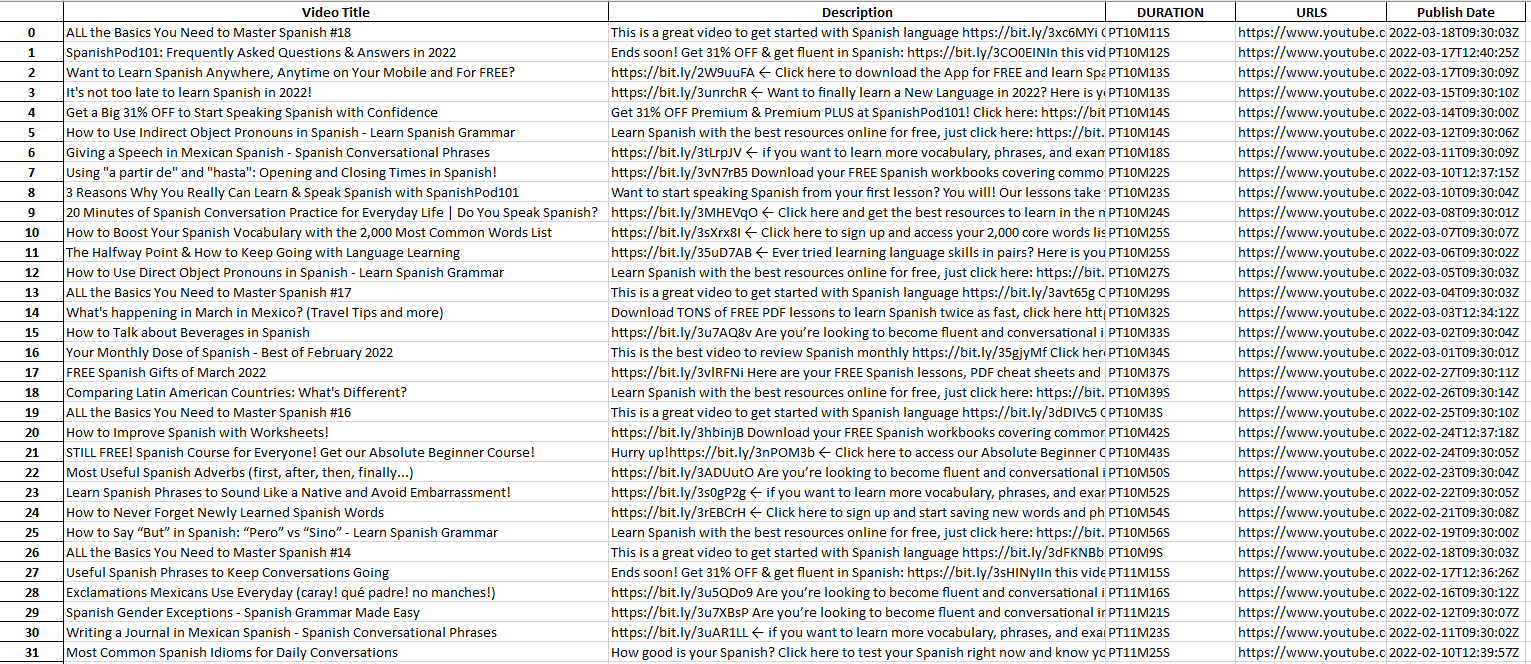